In [1]:
import stopsignal

In [12]:
import re

In [13]:
reg = re.compile('.*/sub-(?P<subj_idx>[0-9]+)/func/sub-[0-9]+_task-(?P<task>[a-z]+)_run-(?P<run>[0-9]+)_events.tsv')

In [14]:
import glob
import os

In [15]:
fns = glob.glob(os.path.join(os.environ['HOME'], 'data/openfmri/ds008/sub*/func/sub-*_task-stopsignal_run-*_events.tsv'))

In [148]:
import pandas

In [324]:
dfs = []

for fn in fns:
    d = reg.match(fn).groupdict()
    
    dfs.append(pandas.read_csv(fn, sep='\t', index_col=False,na_values=['n/a', 'junk']))
    dfs[-1]['subj_idx'] = d['subj_idx']
    dfs[-1]['run'] = d['run']
    
df = pandas.concat(dfs)

In [325]:
df = df[~df.response_time.isnull() & (~df.trial_type.isnull())]

In [ ]:
df[(df.subj_idx == 14) & (df.trial_type == '')]

In [327]:
df['rt'] = df['response_time'] * 1000.
df['ssd'] = (df['SSD']*1000)
df.loc[(df.trial_type == 'go'), 'ssd'] = -999
df['ssd'] = df.ssd.astype(int)
df['inhibited'] = df.trial_type.map({'go':-999, 'failed stop':0, 'successful stop':1})
df['ss_presented'] = df.trial_type.map({'go':0, 'failed stop':1, 'successful stop':1}).astype(int)

In [328]:
df.trial_type.unique()

array(['go', 'failed stop', 'successful stop'], dtype=object)

In [329]:
df = df[~((df.subj_idx == '14') & (df.rt > 500))]

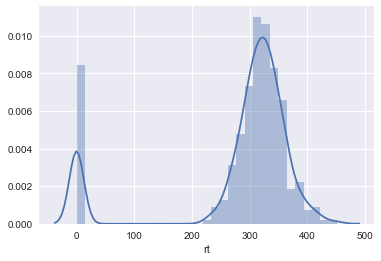

In [330]:
sns.distplot(df[(df.subj_idx == '14')].rt)

In [331]:
df[(df.subj_idx == '14')].groupby(['trial_type', 'inhibited', 'ss_presented']).size()

trial_type       inhibited  ss_presented
failed stop       0         1                49
go               -999       0               279
successful stop   1         1                46
dtype: int64

In [333]:
df.groupby(['subj_idx', 'trial_type']).ssd.min()

subj_idx  trial_type     
01        failed stop        150
          go                -999
          successful stop     50
02        failed stop        150
          go                -999
          successful stop    100
03        failed stop        250
          go                -999
          successful stop    100
04        failed stop        100
          go                -999
          successful stop     50
05        failed stop        200
          go                -999
          successful stop    100
06        failed stop        100
          go                -999
          successful stop     50
07        failed stop        100
          go                -999
          successful stop     50
09        failed stop        200
          go                -999
          successful stop    100
10        failed stop        150
          go                -999
          successful stop    100
11        failed stop        150
          go                -999
          success

In [334]:
df[(df.subj_idx == '14')][['rt', 'ssd', 'inhibited', 'ss_presented']].groupby(['ss_presented', 'inhibited']).mean()

rt         ssd
ss_presented inhibited                        
0            -999       324.734767 -999.000000
1             0         317.979592  167.346939
              1           0.000000  116.304348

In [338]:
model = stopsignal.StopSignal(df)

In [339]:
model.sample(10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 776.1 sec

Plotting mu_go
Plotting mu_go_std
Plotting sigma_go
Plotting sigma_go_std
Plotting tau_go
Plotting tau_go_std
Plotting mu_stop
Plotting mu_stop_std
Plotting sigma_stop
Plotting sigma_stop_std
Plotting tau_stop
Plotting tau_stop_std


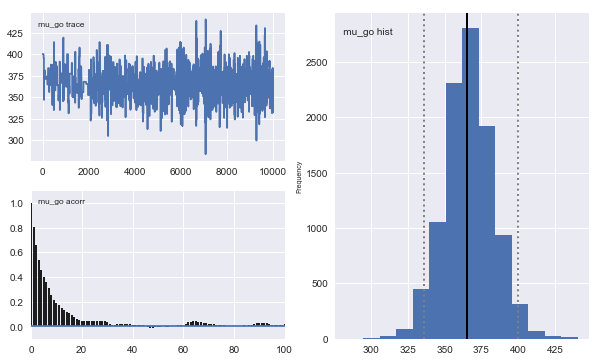

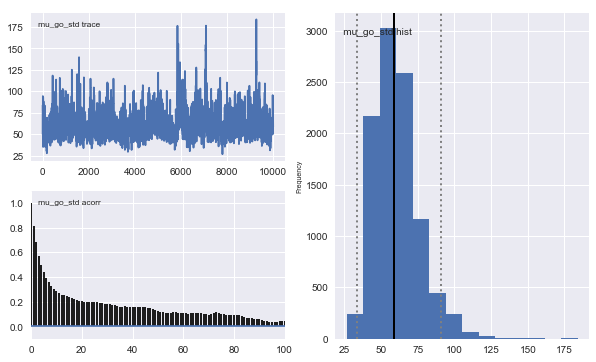

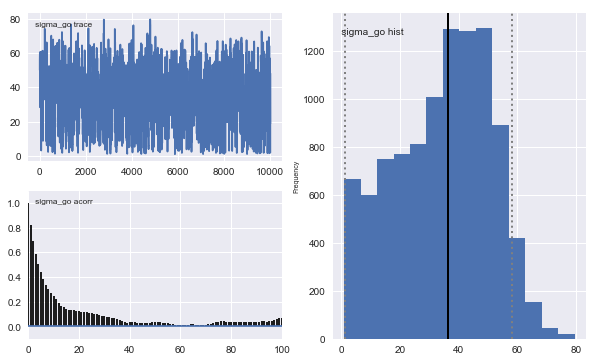

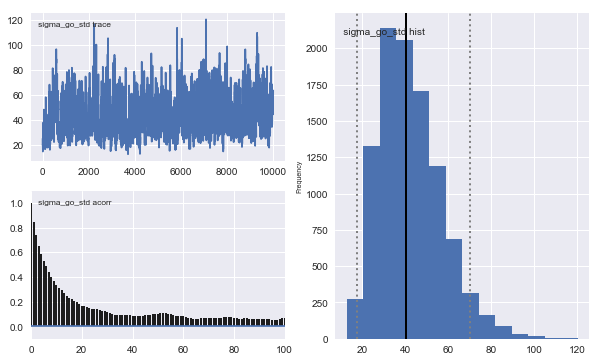

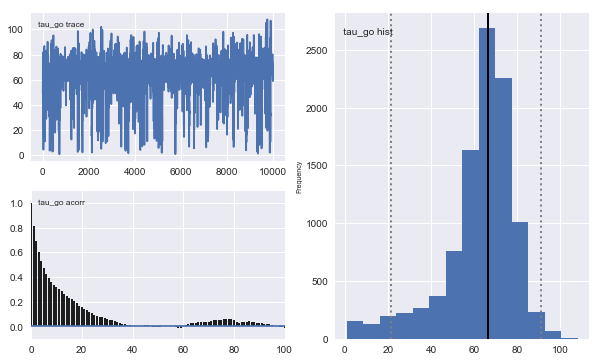

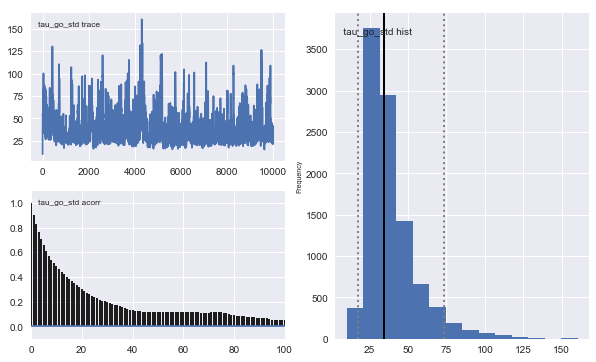

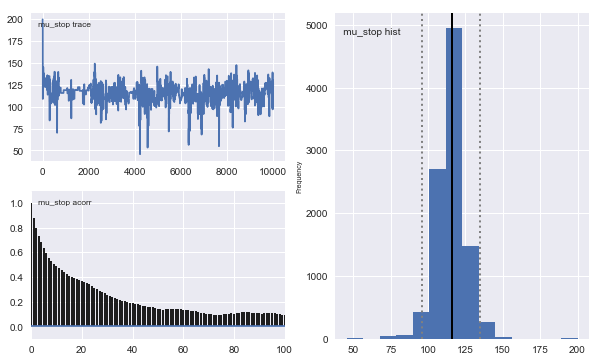

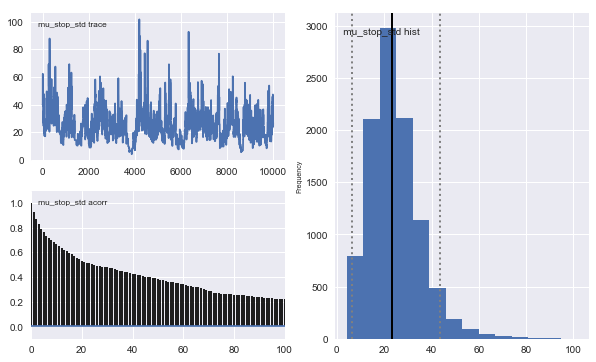

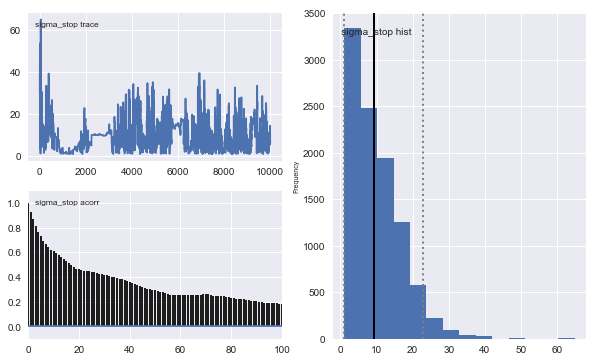

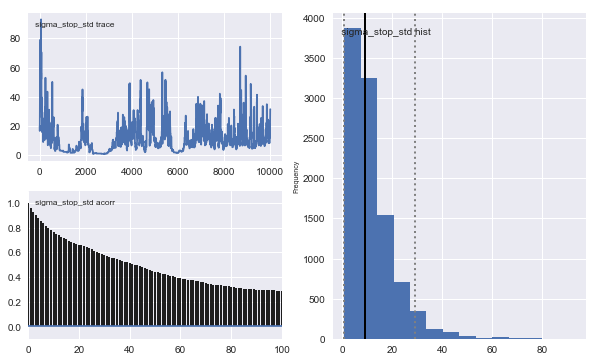

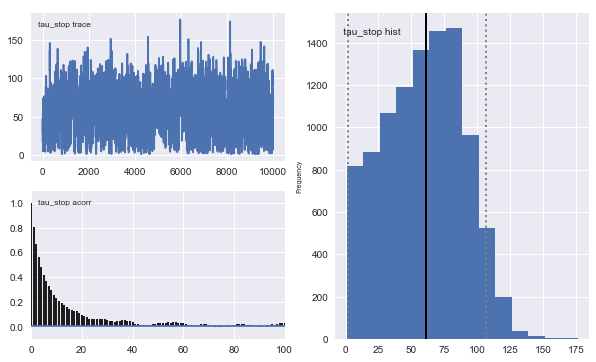

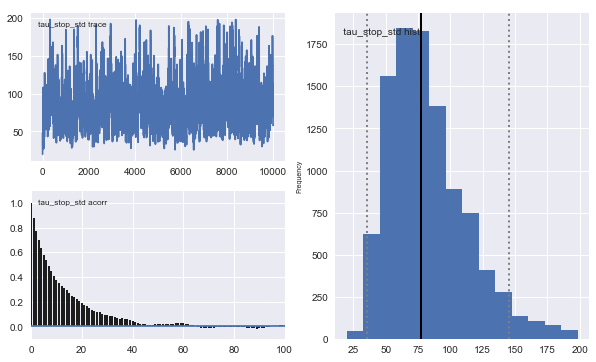

In [340]:
model.plot_posteriors()

In [344]:
subj_nodes

,knode_name,stochastic,observed,subj,node,tag,depends,hidden,CorrectGo,Response,...,inhibited,ss_presented,mean,std,2.5q,25q,50q,75q,97.5q,mc err
mu_go_subj.01,mu_go_subj,True,False,True,mu_go_subj.01,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,397.787,6.2032,385.502,393.879,397.529,401.351,410.218,0.430887
mu_go_subj.02,mu_go_subj,True,False,True,mu_go_subj.02,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,366.192,9.78942,347.283,360.161,365.822,371.924,388.259,0.665509
mu_go_subj.03,mu_go_subj,True,False,True,mu_go_subj.03,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,386.324,6.90564,372.578,381.592,386.147,390.982,399.535,0.477083
mu_go_subj.04,mu_go_subj,True,False,True,mu_go_subj.04,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,354.567,8.60401,339.602,348.908,354.368,359.118,371.182,0.653108
mu_go_subj.05,mu_go_subj,True,False,True,mu_go_subj.05,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,351.097,5.30319,341.557,347.667,350.674,354.634,360.461,0.379722
mu_go_subj.06,mu_go_subj,True,False,True,mu_go_subj.06,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,348.342,10.9346,333.854,341.506,346.367,351.065,377.929,1.0044
mu_go_subj.07,mu_go_subj,True,False,True,mu_go_subj.07,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,349.078,7.40821,339.017,345.31,348.89,351.49,358.581,0.662153
mu_go_subj.09,mu_go_subj,True,False,True,mu_go_subj.09,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,361.551,4.13441,354.474,359.15,361.152,363.516,370.98,0.333978
mu_go_subj.10,mu_go_subj,True,False,True,mu_go_subj.10,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,377.659,7.06393,365.439,373.291,377.281,381.972,398.588,0.57053
mu_go_subj.11,mu_go_subj,True,False,True,mu_go_subj.11,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,335.721,6.40274,323.535,331.459,335.537,340.137,347.904,0.399942


In [347]:
subj_nodes = model.get_subj_nodes()
subj_nodes = subj_nodes[subj_nodes.knode_name == 'mu_stop_subj']
tmp = subj_nodes[['subj_idx', 'tag', 'node', 'mean']]

In [351]:
tmp.set_index('subj_idx')

,tag,node,mean
subj_idx,,,
01,(),mu_stop_subj.01,108.015
02,(),mu_stop_subj.02,108.976
03,(),mu_stop_subj.03,125.291
04,(),mu_stop_subj.04,95.9281
05,(),mu_stop_subj.05,124.413
06,(),mu_stop_subj.06,111.226
07,(),mu_stop_subj.07,149.242
09,(),mu_stop_subj.09,131.76
10,(),mu_stop_subj.10,88.03


In [352]:
tmp.to_csv('ssrts.csv')

In [356]:
subj_nodes = model.get_subj_nodes()
subj_nodes = subj_nodes[subj_nodes.knode_name == 'mu_go_subj']
tmp = subj_nodes[['subj_idx', 'tag', 'node', 'mean']]

In [357]:
tmp.to_csv('mu_go.csv')